In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from plotnine import *

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.shape

(6168, 18)

In [19]:
df.head(3)

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
0,20210101,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.0,1.5
1,20210101,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.0,1.5
2,20210101,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.0,1.5


In [9]:
df.tail(3)

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
6165,20210914,21,134,130,125,124,128,149,22.2,4.3,76,9.4,167.2,2,14,9,0.290448,1.5
6166,20210914,22,100,109,120,114,111,66,22.0,2.5,79,9.4,167.2,2,14,9,0.148984,1.5
6167,20210914,23,117,119,112,91,110,405,22.0,2.5,79,9.4,167.2,2,14,9,0.922551,1.5


- 종속변수인 평균을 줄이는 방법?

In [28]:
import statsmodels.api as sm
X = sm.add_constant(df.iloc[:,[0,1,7,8,9,10,11,12,13,14,15,16,17]])
y = df.iloc[:,6]
# 회귀 모델 피팅
model = sm.OLS(y, X)
results = model.fit()

# 회귀 분석 결과 요약
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     평균   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     372.1
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        14:01:56   Log-Likelihood:                -32045.
No. Observations:                6168   AIC:                         6.412e+04
Df Residuals:                    6155   BIC:                         6.420e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.001e-05   2.79e-06     -3.590      0.0

In [18]:
df["전기요금(계절)"].unique()
# 2021년 봄의 전기요금
# 2021년 여름의 전기요금
# 2021년 가을의 전기요금

array([109.8, 167.2, 191.6])

In [20]:
df.isnull().sum()

날짜           0
시간           0
15분          0
30분          0
45분          0
60분          0
평균           0
생산량          0
기온           0
풍속           3
습도           0
강수량          1
전기요금(계절)     0
day          0
d            0
m            0
공장인원        17
인건비          0
dtype: int64

In [21]:
df.fillna(0, inplace=True)

- 분석 목적
  - 아!어떤 공장에서의 전력사용량을 의미하는 건가?.,
  - 한국전력공사는 `제조현장에서의` 3개월 간(계절별?)의 최대 피크 전력을 기준으로 1년간의 전기료를 부과하고 있음
  - 제조공정에서의 의도치 않은 `최대 피크 전력 발생`은 `전기료 증가`로 인한 제조비용을 증가시키는 요인으로 작용한다.
    - 따라서, 해당 데이터셋과 AI 모델을 통해 실제 제조공정에서 발생할 수 있는 최대 피크 전력을 낮추는 것을 목적으로 한다.

- 해당 목적을 달성하기 위해 주요 변수 간의 상관관계 분석을 통해 다양한 머신러닝 방법과 알고리즘을 활용한 에너지 사용량 예측 모델을 개발하여 전력 자원 최적화를 달성한다.

- "15분", "30분", "45분", "60분", "평균"
  - 제조공정에서의 전력 사용량?..
- "날짜", "day", "d", "m"
  - "day" -> 요일
- "생산량"
  - 공정에서 만든 전기량?
  - 그래서 휴일엔 생산량이 0인가?..
- "인건비"
  - 시간별로 다른 거 같음
- "전기요금(계절)"
  - 이게 y인가?

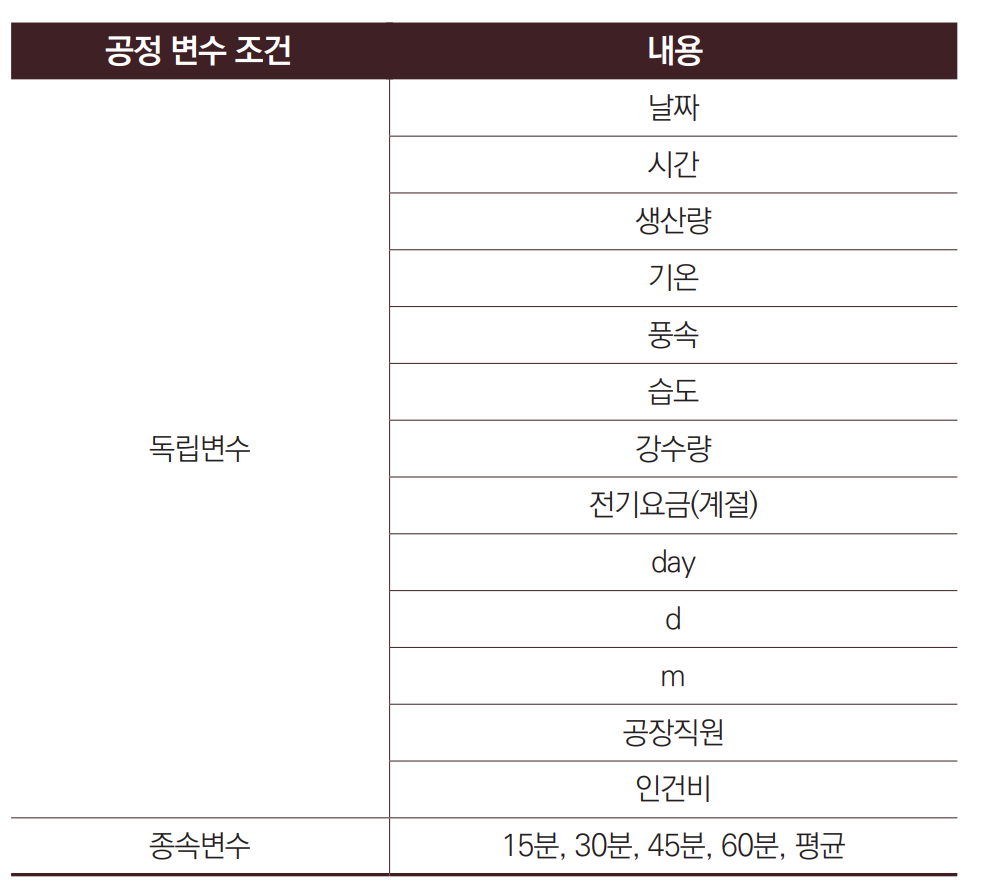

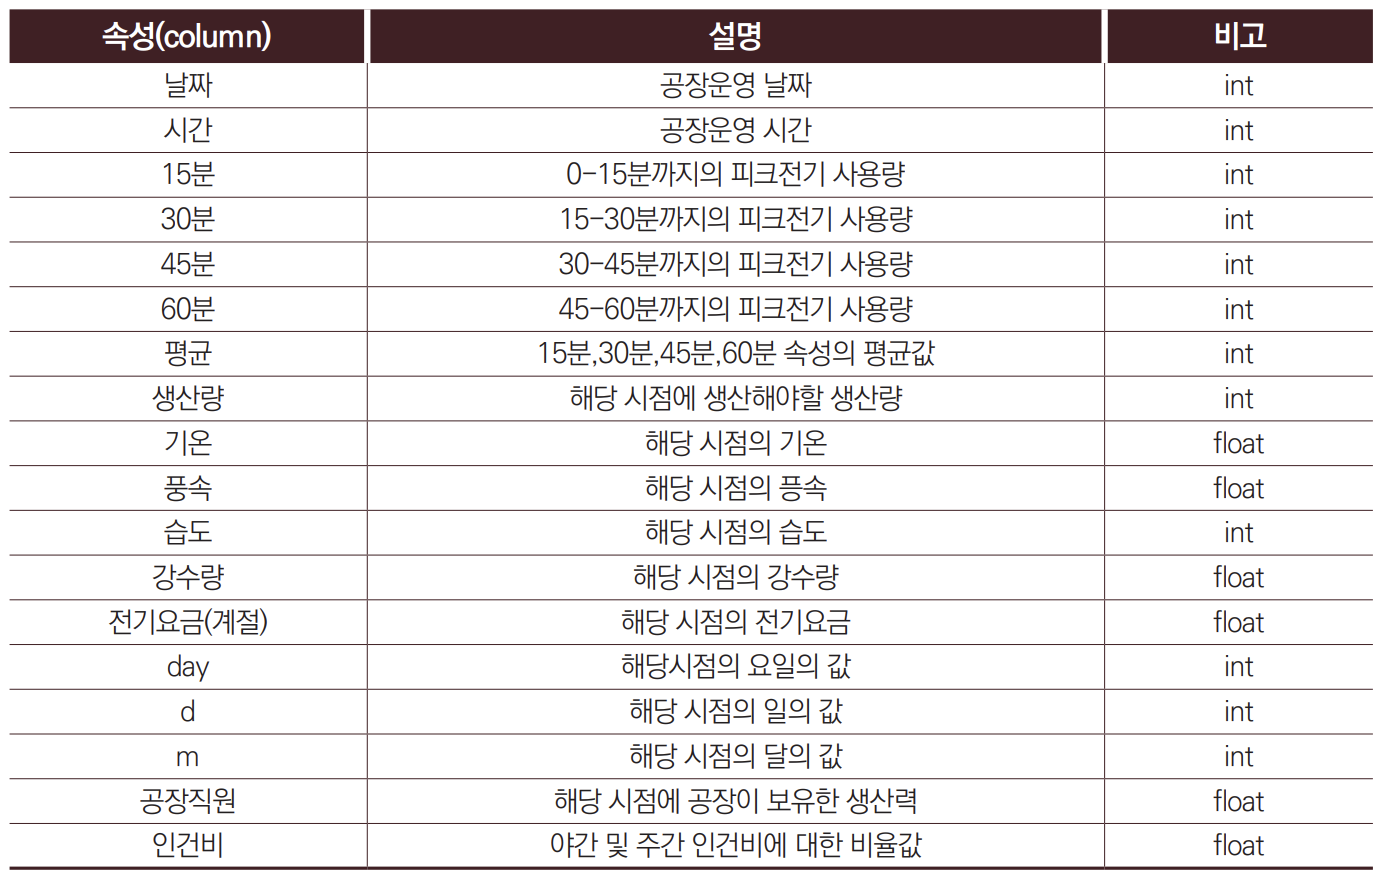

- 시각화
  - 1년마다 3개월간의 최대 피크 전력 plotting?
  - 1년동안 최대피크 전력과 다른 변수간의 관계 파악?
    - 이때 최대피크 전력을 높이는 변수에 대해서 해결책을 제시?
- 회귀분석
  - 전진선택, 후진선택, AIC등등?
- AI모델 사용해서
- 회귀분석과 AI모델 비교해서 뭐가 더 나은지?
- 이정도하면 될 거 같은데?